In [2]:
!pip install yfinance

In [4]:
import pandas as pd 
import numpy as np 
import math 
import matplotlib.pyplot as plt
import sqlite3
import yfinance

In [5]:
AAL = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAL?period1=1562864709&period2=1594487109&interval=1d&events=history")

AAL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-11,33.060001,33.299999,32.820000,33.029999,32.687084,6842900
1,2019-07-12,33.119999,33.900002,33.000000,33.779999,33.429298,5012200
2,2019-07-15,33.669998,33.950001,33.419998,33.610001,33.261063,3483600
3,2019-07-16,33.700001,34.669998,33.700001,34.220001,33.864731,6353600
4,2019-07-17,34.340000,34.419998,33.110001,33.259998,32.914696,5881900
...,...,...,...,...,...,...,...
248,2020-07-06,12.800000,12.920000,12.210000,12.800000,12.800000,79312900
249,2020-07-07,12.510000,12.540000,11.910000,11.910000,11.910000,77998100
250,2020-07-08,11.600000,12.080000,11.430000,11.990000,11.990000,85034500
251,2020-07-09,11.940000,11.940000,11.150000,11.180000,11.180000,77131200


In [6]:
AAL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-11,33.060001,33.299999,32.820000,33.029999,32.687084,6842900
1,2019-07-12,33.119999,33.900002,33.000000,33.779999,33.429298,5012200
2,2019-07-15,33.669998,33.950001,33.419998,33.610001,33.261063,3483600
3,2019-07-16,33.700001,34.669998,33.700001,34.220001,33.864731,6353600
4,2019-07-17,34.340000,34.419998,33.110001,33.259998,32.914696,5881900


In [7]:
AAL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-07-06,12.80,12.92,12.21,12.80,12.80,79312900
249,2020-07-07,12.51,12.54,11.91,11.91,11.91,77998100
250,2020-07-08,11.60,12.08,11.43,11.99,11.99,85034500
251,2020-07-09,11.94,11.94,11.15,11.18,11.18,77131200
252,2020-07-10,11.00,11.95,10.98,11.94,11.94,90206600


In [8]:
AAL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-07-06,12.80,12.92,12.21,12.80,12.80,79312900
249,2020-07-07,12.51,12.54,11.91,11.91,11.91,77998100
250,2020-07-08,11.60,12.08,11.43,11.99,11.99,85034500
251,2020-07-09,11.94,11.94,11.15,11.18,11.18,77131200
252,2020-07-10,11.00,11.95,10.98,11.94,11.94,90206600


In [9]:
AAL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,22.765455,23.235889,22.193557,22.654229,22.557045,3.746376e+07
std,7.885943,7.813549,7.987817,7.926610,7.848611,5.264014e+07
min,8.770000,9.190000,8.250000,9.040000,9.040000,2.373600e+06
25%,13.590000,14.810000,12.830000,13.920000,13.920000,6.352900e+06
50%,27.080000,27.530001,26.740000,27.010000,26.883190,9.645300e+06
75%,28.639999,28.910000,28.139999,28.600000,28.442356,5.964980e+07
max,34.549999,34.990002,33.700001,34.590000,34.230892,4.286171e+08


<function matplotlib.pyplot.show(*args, **kw)>

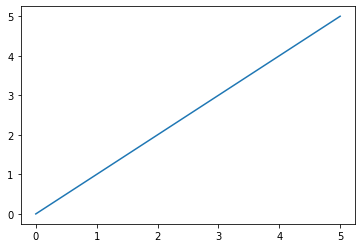

In [10]:
plt.plot([0,1,2,3,4,5])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

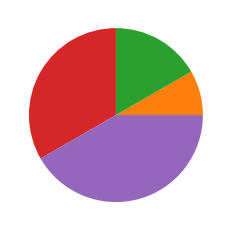

In [48]:
plt.pie([0,1,2,4,5]) 
plt.show

In [12]:
import pandas_datareader as pdr 
import datetime 
AAL = pdr.get_data_yahoo("AAL",
                          start=datetime.datetime(2006,10,1),
                          end=datetime.datetime(2012,1,1))

AAL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,46.549999,44.849998,45.000000,46.110001,1710900,43.469803
2006-10-03,48.029999,45.919998,46.599998,47.660000,2274000,44.931061
2006-10-04,48.560001,46.959999,47.660000,47.459999,2173100,44.742508
2006-10-05,48.220001,45.830002,47.259998,48.110001,1391600,45.355289
2006-10-06,48.709999,47.189999,47.900002,47.750000,1195700,45.015900


In [15]:
import sqlite3

In [16]:
conn = sqlite3.connect("AAL.db")
c = conn.cursor()

In [18]:
AAL.to_sql("AAL", conn, if_exists='replace')

In [19]:
#See data
c.execute("""SELECT * FROM AAL""")
rows = c.fetchall()
rows

[('2006-10-02 00:00:00',
  46.54999923706055,
  44.849998474121094,
  45.0,
  46.11000061035156,
  1710900,
  43.46980285644531),
 ('2006-10-03 00:00:00',
  48.029998779296875,
  45.91999816894531,
  46.599998474121094,
  47.65999984741211,
  2274000,
  44.931060791015625),
 ('2006-10-04 00:00:00',
  48.560001373291016,
  46.959999084472656,
  47.65999984741211,
  47.459999084472656,
  2173100,
  44.74250793457031),
 ('2006-10-05 00:00:00',
  48.220001220703125,
  45.83000183105469,
  47.2599983215332,
  48.11000061035156,
  1391600,
  45.355289459228516),
 ('2006-10-06 00:00:00',
  48.709999084472656,
  47.189998626708984,
  47.900001525878906,
  47.75,
  1195700,
  45.015899658203125),
 ('2006-10-09 00:00:00',
  47.29999923706055,
  46.5,
  47.02000045776367,
  47.029998779296875,
  907300,
  44.337127685546875),
 ('2006-10-10 00:00:00',
  48.349998474121094,
  47.689998626708984,
  47.95000076293945,
  48.279998779296875,
  1317800,
  45.51555633544922),
 ('2006-10-11 00:00:00',
  4

In [20]:
AAL.to_excel("AAL.xls")

pd.read_excel("AAL.xls")

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-10-02,46.549999,44.849998,45.000000,46.110001,1710900,43.469803
1,2006-10-03,48.029999,45.919998,46.599998,47.660000,2274000,44.931061
2,2006-10-04,48.560001,46.959999,47.660000,47.459999,2173100,44.742508
3,2006-10-05,48.220001,45.830002,47.259998,48.110001,1391600,45.355289
4,2006-10-06,48.709999,47.189999,47.900002,47.750000,1195700,45.015900
...,...,...,...,...,...,...,...
1318,2011-12-23,5.720000,5.420000,5.700000,5.620000,4990700,5.298207
1319,2011-12-27,5.690000,5.380000,5.560000,5.400000,3968800,5.090804
1320,2011-12-28,5.470000,5.110000,5.470000,5.190000,6446000,4.892828
1321,2011-12-29,5.280000,5.170000,5.220000,5.230000,3537100,4.930539


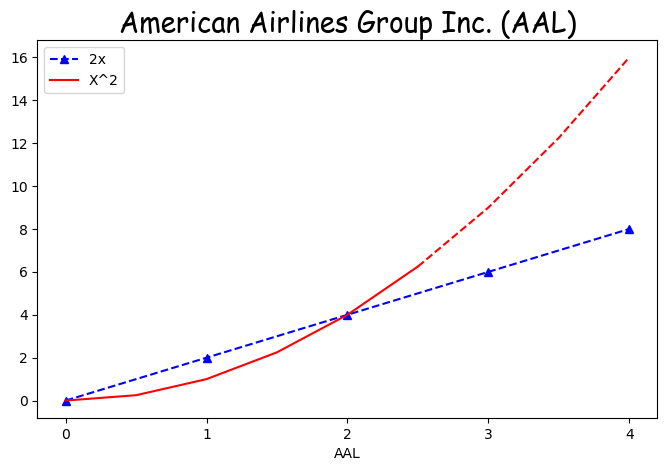

In [22]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('American Airlines Group Inc. (AAL)', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('AAL')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

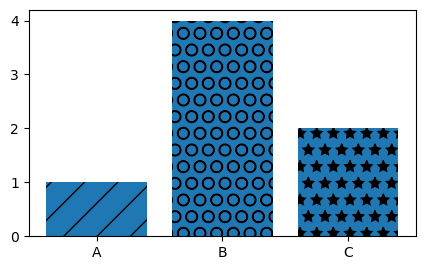

In [23]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()